In [1]:
import pandas as pd
import numpy as np
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from IPython.display import display

In [2]:
#### EURUSD 2009-2014 dataset

In [3]:
# load  dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'
year=20092014
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [4]:
model = Baseline01(lookahead=1)
Y_test_pred = model.predict(prices_test)
#metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False);
Y_test = prices_test.pct_change(1)

EURUSD 20092014: f1-score: 0.484, mean future return: -0.013 bps, (-0.013 bps), annualized future return -0.379 (-0.377)


In [8]:
best = None
best_w = None
for w in range(1,21):
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
  
    print(w,m['f1_score'])
    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02SMA(lookahead=1, window=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


(1, 0.48432049087155088)
(2, 0.48519320130863414)
(3, 0.48459117744730135)
(4, 0.48383081177427184)
(5, 0.48374867305786878)
(6, 0.48302830259337276)
(7, 0.4821745823303924)
(8, 0.48181912633971163)
(9, 0.48145952509164364)
(10, 0.48092144806615855)
(11, 0.48100359212664673)
(12, 0.48092436373407865)
(13, 0.48072490433475412)
(14, 0.48009570551677572)
(15, 0.48029664209086415)
(16, 0.48014036752447298)
(17, 0.47997628453284436)
(18, 0.47999741168736632)
(19, 0.47960895779362012)
(20, 0.47968653771743497)
('Best centre-of-mass: ', 2)
EURUSD 20092014: f1-score: 0.485, mean future return: -0.010 bps, (-0.010 bps), annualized future return -0.320 (-0.319)


In [9]:
best = None
best_w = None
for w in range(1,21):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
  
    print(w,m['f1_score'])
    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02EWMA(lookahead=1, centre_of_mass=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


(1, 0.48106042812648125)
(2, 0.47952957999409634)
(3, 0.47867584741612884)
(4, 0.4778995565307117)
(5, 0.47716921826789532)
(6, 0.47658355947160852)
(7, 0.4761861064833573)
(8, 0.4758511655171927)
(9, 0.47542488380246095)
(10, 0.47523363843857008)
(11, 0.47503945629076821)
(12, 0.47480697468477623)
(13, 0.47458520612243421)
(14, 0.47435791770917091)
(15, 0.47421184357566137)
(16, 0.4741058615638869)
(17, 0.47394978878266969)
(18, 0.4737270659566501)
(19, 0.47363575093183347)
(20, 0.47354005535381705)
('Best centre-of-mass: ', 1)
EURUSD 20092014: f1-score: 0.481, mean future return: -0.016 bps, (-0.016 bps), annualized future return -0.456 (-0.456)


---------------

#### Idea - inverted signal

Models all give negative results, suggesting that over short timescales price change is mean-reverting. 
Let's try invert the signal, and tune for best performance

In [11]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False);

EURUSD 20092014: f1-score: 0.513, mean future return: 0.012 bps, (0.012 bps), annualized future return 0.572 (0.575)


(1, 0.51289556741033426)
(101, 0.52073183482357288)
(201, 0.52293511310445107)
(301, 0.52572086869446077)
(401, 0.52803591528196459)
(501, 0.53144741486719549)
(601, 0.53402352357122662)
(701, 0.5362532947168539)
(801, 0.53861307734107189)
(901, 0.54085854266264954)
(1001, 0.54266474152564004)
(1101, 0.5441595028635976)
(1201, 0.54512604853135049)
(1301, 0.54651835769213819)
(1401, 0.5470265701150826)
(1501, 0.54786842268614744)
(1601, 0.5483318617822186)
(1701, 0.54903881780092378)
(1801, 0.54980943498129897)
(1901, 0.55069526837187388)
(2001, 0.5516013849941318)
(2101, 0.55252288392216953)
(2201, 0.55274835209210349)
(2301, 0.5532228105924718)
(2401, 0.55391497579488647)
(2501, 0.55402604805668076)
(2601, 0.55450204323448138)
(2701, 0.5546958483805452)
(2801, 0.55521058664211531)
(2901, 0.5554963306216999)
(3001, 0.55566683826560681)
(3101, 0.55595804507777213)
(3201, 0.55614450457786069)
(3301, 0.55615005352425995)
(3401, 0.55648517183051904)
(3501, 0.55642282565039647)
(3601, 0.556

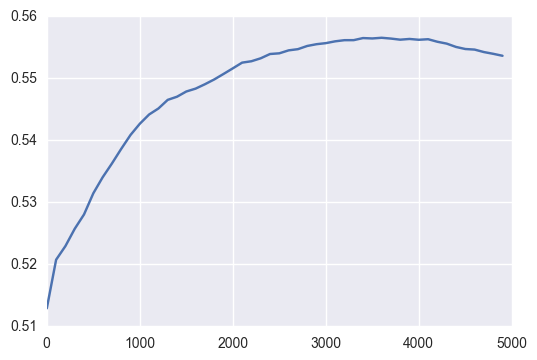

In [18]:
ws = []
f1s = []
best = None
best_w = None
#for w in range(1,21):
#for w in range(21,201,10):
for w in range(1,5001,100):
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    ws.append(w)
    f1s.append(m['f1_score'])
    print (w, m['f1_score'])

    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w
        
plt.plot(ws, f1s)
print("Best w is", best_w)

In [22]:
model = Baseline02SMA(lookahead=1, window=3601)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);

EURUSD 20092014: f1-score: 0.557, mean future return: -0.000 bps, (-0.000 bps), annualized future return -0.008 (-0.007)


(1, 0.51895163156495361)
(101, 0.5311083193621744)
(201, 0.53775043290505165)
(301, 0.54325577631987798)
(401, 0.54692180311868455)
(501, 0.549802389233639)
(601, 0.55207867071554495)
(701, 0.55425286927161943)
(801, 0.55652943022528467)
(901, 0.55863654816790509)
(1001, 0.560386848403717)
(1101, 0.56201570817294388)
(1201, 0.56345007967016625)
(1301, 0.56453573402347568)
(1401, 0.56546154361028567)
(1501, 0.56628440117337331)
(1601, 0.56716219593431616)
(1701, 0.56778054614958284)
(1801, 0.56834259334965931)
(1901, 0.56882822355999518)
(2001, 0.56932942005649867)
(2101, 0.56982842319141014)
(2201, 0.57016361681151551)
(2301, 0.57034665617306401)
(2401, 0.57059334955503216)
(2501, 0.57079072500295758)
(2601, 0.57083953475657245)
(2701, 0.57084542255315429)
(2801, 0.57067182904562885)
(2901, 0.5704319903247671)
(3001, 0.57004341172929696)
(3101, 0.56973934361425382)
(3201, 0.56955602127850291)
(3301, 0.56911089324702102)
(3401, 0.56864367286820394)
(3501, 0.56821010233786495)
(3601, 0.5

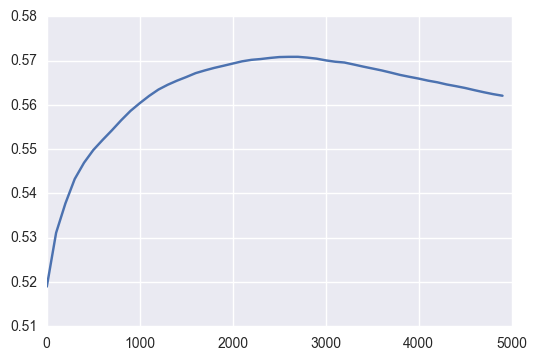

In [20]:
ws = []
f1s = []
best = None
best_w = None
#for w in range(1,21):
#for w in range(21,201,10):
for w in range(1,5001,100):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    ws.append(w)
    f1s.append(m['f1_score'])
    print (w, m['f1_score'])

    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w
        
plt.plot(ws, f1s)
print("Best w is", best_w)

In [26]:
model = Baseline02EWMA(lookahead=1, centre_of_mass=20)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);

EURUSD 20092014: f1-score: 0.526, mean future return: 0.018 bps, (0.018 bps), annualized future return 0.987 (0.987)


In [25]:
Y_test_pred

ts
2009-01-12 05:28:00    0.500000
2009-01-12 05:29:00    0.499800
2009-01-12 05:30:00    0.499800
2009-01-12 05:31:00    0.499900
2009-01-12 05:32:00    0.499925
2009-01-12 05:33:00    0.499719
2009-01-12 05:34:00    0.499783
2009-01-12 05:35:00    0.499857
2009-01-12 05:36:00    0.499901
2009-01-12 05:37:00    0.499822
2009-01-12 05:38:00    0.499658
2009-01-12 05:39:00    0.499689
2009-01-12 05:40:00    0.499783
2009-01-12 05:41:00    0.499792
2009-01-12 05:42:00    0.499793
2009-01-12 05:43:00    0.499800
2009-01-12 05:44:00    0.499826
2009-01-12 05:45:00    0.499842
2009-01-12 05:46:00    0.499828
2009-01-12 05:47:00    0.499746
2009-01-12 05:48:00    0.499774
2009-01-12 05:49:00    0.499790
2009-01-12 05:50:00    0.499809
2009-01-12 05:51:00    0.499836
2009-01-12 05:52:00    0.499839
2009-01-12 05:53:00    0.499829
2009-01-12 05:54:00    0.499859
2009-01-12 05:55:00    0.499869
2009-01-12 05:56:00    0.499881
2009-01-12 05:57:00    0.499874
                         ...   
2014-